In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
from PIL import Image

In [2]:
drone_file_path = 'drone_image_example.tif'
drone_dataset = rasterio.open(drone_file_path)

In [3]:
# Get the bounds(longitudes and latitudes) of the GeoTIFF
drone_bounds = drone_dataset.bounds
print("Bounds:", drone_bounds)

# Get the coordinate reference system (CRS) e.g.EPSG:4326, which means the bounds are recorded in longitudes and latitudes
drone_crs = drone_dataset.crs
print("CRS:", drone_crs)

Bounds: BoundingBox(left=-77.16349906202836, bottom=17.818361485870938, right=-77.16284016451637, top=17.824140865870937)
CRS: EPSG:4326


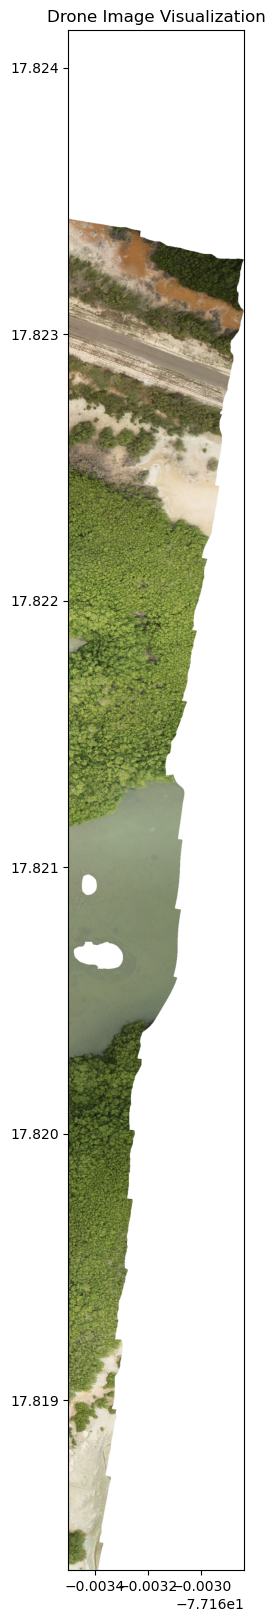

In [4]:
# Plotting the raster data
fig, ax = plt.subplots(figsize=(20, 20))
show(drone_dataset, ax=ax)
plt.title("Drone Image Visualization")
plt.show()

In [5]:
satellite_file_path = 'satellite_image_example.tif'
satellite_dataset = rasterio.open(satellite_file_path)

In [6]:
# Get the bounds(longitudes and latitudes) of the GeoTIFF
satellite_bounds = satellite_dataset.bounds
print("Bounds:", satellite_bounds)

# Get the coordinate reference system (CRS) e.g.EPSG:4326, which means the bounds are recorded in longitudes and latitudes
satellite_crs = satellite_dataset.crs
print("CRS:", satellite_crs)

Bounds: BoundingBox(left=-77.16357610682707, bottom=17.818353155095945, right=-77.16276762307136, top=17.82410237291431)
CRS: EPSG:4326


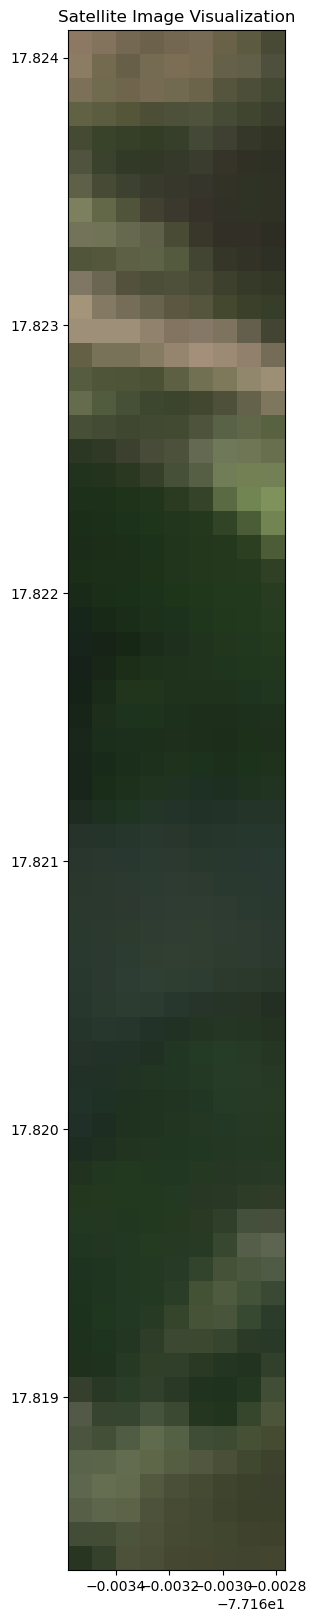

In [7]:
# Plotting the raster data
fig, ax = plt.subplots(figsize=(20, 20))
show(satellite_dataset, ax=ax)
plt.title("Satellite Image Visualization")
plt.show()

In [8]:
satellite_image_example = Image.open(satellite_file_path)
rgb_satellite_image_example = satellite_image_example.convert("RGB")
rgb_matrix_satellite_image_example = np.array(rgb_satellite_image_example)
print(rgb_matrix_satellite_image_example)
print(rgb_matrix_satellite_image_example.shape) # (height, width, 3 which is the number of color channels)

[[[140 120  99]
  [131 115  92]
  [117 104  83]
  ...
  [105  98  73]
  [ 93  90  66]
  [ 73  74  53]]

 [[141 124 100]
  [116 106  80]
  [104  95  73]
  ...
  [101  97  72]
  [ 97  95  71]
  [ 78  79  60]]

 [[125 112  89]
  [112 106  78]
  [110 101  76]
  ...
  [ 85  85  62]
  [ 76  78  57]
  [ 67  72  51]]

 ...

 [[ 87  95  71]
  [ 93 101  74]
  [ 92  99  71]
  ...
  [ 61  67  44]
  [ 59  64  43]
  [ 59  64  43]]

 [[ 67  76  55]
  [ 67  77  53]
  [ 76  84  59]
  ...
  [ 65  70  46]
  [ 63  67  45]
  [ 62  66  45]]

 [[ 40  53  33]
  [ 54  65  43]
  [ 77  81  58]
  ...
  [ 66  69  47]
  [ 65  68  47]
  [ 67  69  47]]]
(64, 9, 3)


In [9]:
with rasterio.open("satellite_image_jamaica.tif") as src:
    rgb_matrix_satellite_image = src.read([1, 2, 3])  # Read the first three bands as RGB

# Reshape the array to (height, width, 3)
rgb_matrix_satellite_image = np.transpose(rgb_matrix_satellite_image, (1, 2, 0))
np.save("rgb_matrix_satellite_image_jamaica.npy", rgb_matrix_satellite_image)
print(rgb_matrix_satellite_image.shape)

(9097, 24336, 3)
